In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [137]:
import vaex
from astropy import coordinates as C
from astropy import units as u
from astropy.wcs import WCS
from astropy.io import fits
from glob import glob

In [3]:
def ellR(ra, dec, ra0, dec0, PA, e, sky=False):
    RAD = np.pi/180.
    cPA = np.cos(RAD*PA)
    sPA = np.sin(RAD*PA)
    if sky:
        X = (ra - ra0)*np.cos(np.deg2rad(dec0))
    else:
        X = (ra - ra0)
    Y = (dec - dec0)
    R = np.sqrt(((X*cPA - Y*sPA)/(1-e))**2 + (X*sPA+ Y*cPA)**2)
    return R

In [4]:
ds = vaex.open('/data/users/gaia/gaia-dr2/gaia-dr2-sort-by-source_id.hdf5')

In [83]:
cen = C.SkyCoord.from_name('Fornax Dwarf Galaxy')
print(cen)
censtr = "02h39m53s -34d30m25s"
cen = C.SkyCoord(censtr)
print(cen)

<SkyCoord (ICRS): (ra, dec) in deg
    (39.99708, -34.44917)>
<SkyCoord (ICRS): (ra, dec) in deg
    (39.97083333, -34.50694444)>


In [50]:
ds.select('(abs(ra-39.99) < 30) & (abs(dec+34.45) < 30)', name='pos')
ds.export_hdf5('fornax_square.hdf5', selection='pos', progress=True)       


[########################################]:  99.99% estimated time:        0s =  0.0m =  0.0h 

In [108]:
dss = vaex.open('fornax_square.hdf5')
ra = dss.ra.values
dec = dss.dec.values
l = dss.l.values
b = dss.b.values
G = dss.phot_g_mean_mag.values
BP = dss.phot_bp_mean_mag.values
RP = dss.phot_rp_mean_mag.values
pmra = dss.pmra.values
pmdec = dss.pmdec.values
w = dss.parallax.values

/Software/users/modules/7/software/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


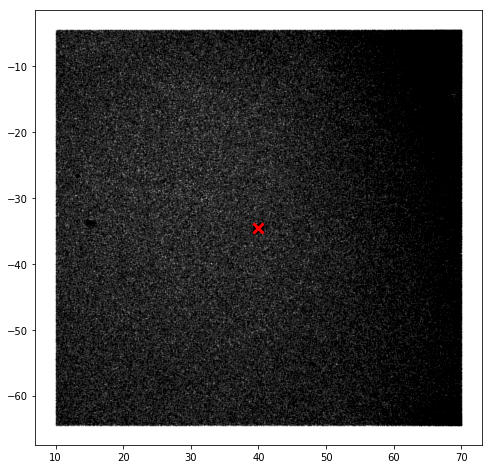

In [ ]:
figure(figsize=(8,8))
j = (G<19)*(w<0.8)
plot(ra[j], dec[j], 'k.', ms=1, alpha=0.1)
plot(cen.ra.deg, cen.dec.deg, 'rx', mew=3, ms=10)
coo = C.SkyCoord(ra*u.deg, dec*u.deg)
sep = cen.separation(coo)

In [106]:
figure(figsize=(8,8))
j = (G<20)*(w<0.8)*(BP-RP > 1.25)
pmrac = 0.35
pmdecc = -0.35
rad = ellR(pmra, pmdec, pmrac, pmdecc, 155, 0.7)

rad2 = ellR(pmra, pmdec, -0.5, -2.5, 30, 0.7)

h = rad < 0.7
h2 = rad2 < 1)

plot(pmra[j], pmdec[j], 'k.', ms=1, alpha=0.01)
plot(pmra[j*h], pmdec[j*h], 'r.', ms=1, alpha=0.3)
plot(pmra[j*h2], pmdec[j*h2], 'r.', ms=1, alpha=0.3)
xlim(-10,10)
ylim(-10,10)

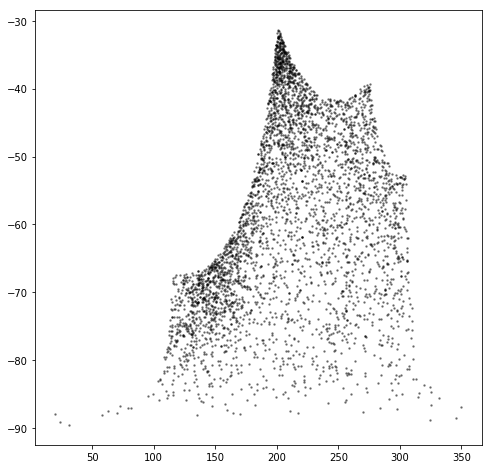

In [111]:
figure(figsize=(8,8))
plot(l[j*h2], b[j*h2], 'k.', ms=3, alpha=0.4)

/Software/users/modules/7/software/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/Software/users/modules/7/software/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


17702


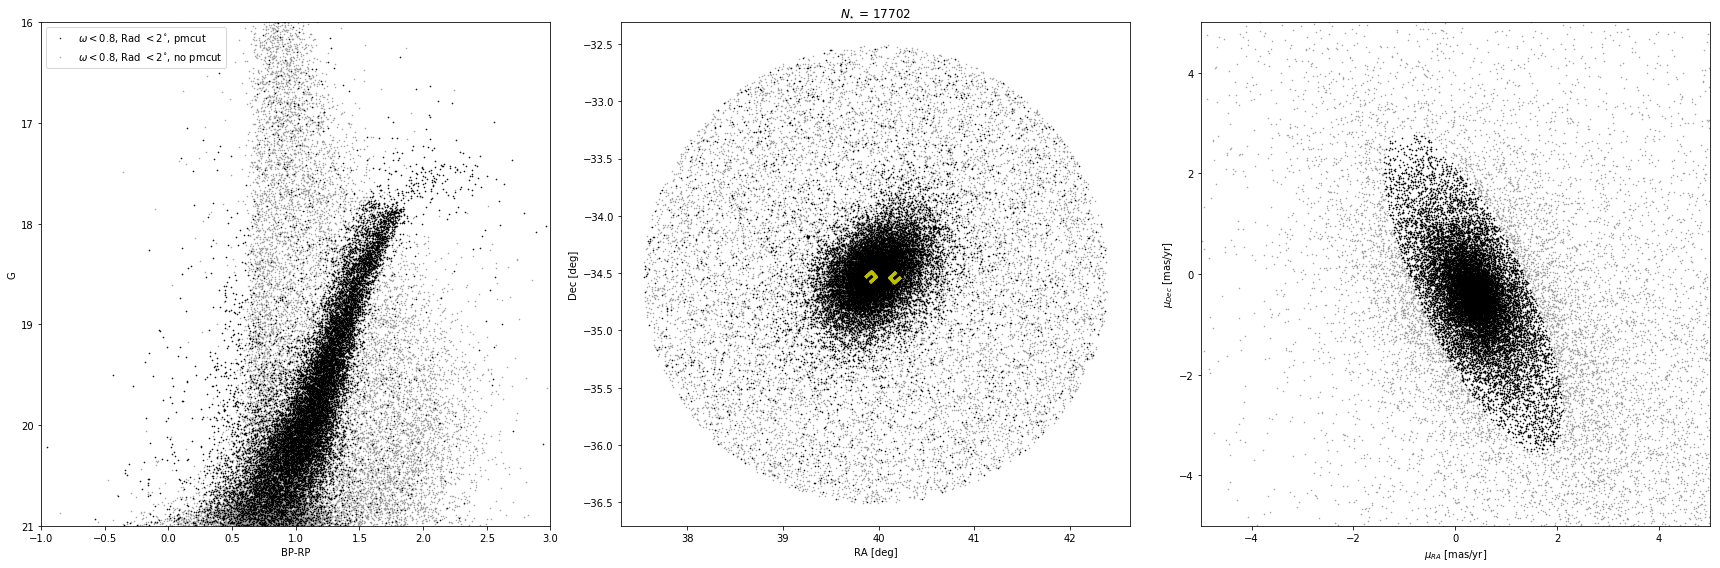

In [155]:
figure(figsize=(24,8))
ax1 = subplot(131)
ax2 = subplot(132)
ax3 = subplot(133)
j = (G<21)*(w<0.8)*(rad < 3.5)*(sep < 2*u.deg)
ax1.plot(BP[j]-RP[j], G[j], 'k.', ms=1, label=r'$\omega < 0.8$, Rad $< 2^{\circ}$, pmcut', zorder=99)
ax2.plot(ra[j], dec[j], 'k.', ms=1, label=r'$\omega < 0.8$, Rad $< 2^{\circ}$, pmcut', zorder=99)
ax3.plot(pmra[j], pmdec[j], 'k.', ms=1, label=r'$\omega < 0.8$, Rad $< 2^{\circ}$, pmcut', zorder=99)
Nstar = len(ra[j])

print(Nstar)




j = (G<21)*(w<0.8)*(sep < 2*u.deg)
ax1.plot(BP[j]-RP[j], G[j], c='0.6', ls='None', marker='.', ms=1, label=r'$\omega < 0.8$, Rad $< 2^{\circ}$, no pmcut')
ax2.plot(ra[j], dec[j], c='0.6', ls='None', marker='.', ms=1, label=r'$\omega < 0.8$, Rad $< 2^{\circ}$, no pmcut')
ax3.plot(pmra[j], pmdec[j], c='0.6', ls='None', marker='.', ms=1, label=r'$\omega < 0.8$, Rad $< 2^{\circ}$, no pmcut')

ax1.set_xlabel('BP-RP')
ax1.set_ylabel('G')
ax1.set_ylim(21, 16)
ax1.set_xlim(-1,3)
ax1.legend(loc='best')

ax2.set_xlabel('RA [deg]')
ax2.set_ylabel('Dec [deg]')
ax2.set_title('$N_{\star}$ = '+str(Nstar))

ax3.set_xlabel('$\mu_{RA}$ [mas/yr]')
ax3.set_ylabel('$\mu_{Dec}$ [mas/yr]')
ax3.set_xlim(-5,5)
ax3.set_ylim(-5,5)



## Plt some HST observations
scoo1 = "02h40m40.42s	-34d32m34.3s"

#a = open('untitled.txt')
#lines = a.readlines()
#for line in lines:
#    if 'ACS' in line:
#        scoo1 = ' '.join(line.split()[0:2])
#        #print(line)
#        coo1 = C.SkyCoord(scoo1, unit=[u.hourangle, u.degree])
#        #print(coo1)
#        ax2.plot(coo1.ra.deg, coo1.dec.deg, 'bo', ms=10, zorder=100)
#    if 'WFC3' in line:
#        scoo1 = ' '.join(line.split()[0:2])
#        #print(line)
#        coo1 = C.SkyCoord(scoo1, unit=[u.hourangle, u.degree])
#        #print(coo1)
#        ax2.plot(coo1.ra.deg, coo1.dec.deg, 'ro', ms=10, zorder=100)
#        


        
        
        
imdir = '/data/users/balbinot/Fornax/'
fl = glob(imdir+'/*drc.fits')
for file in fl:
    hdr = fits.getheader(file, ext=1)
    wcs = WCS(hdr)
    edg = wcs.calc_footprint(undistort=True)
    ax2.plot(edg[:,0], edg[:,1], 'y-', lw=3, zorder=199)


tight_layout()
savefig('fornax_summary.png')

/Software/users/modules/7/software/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


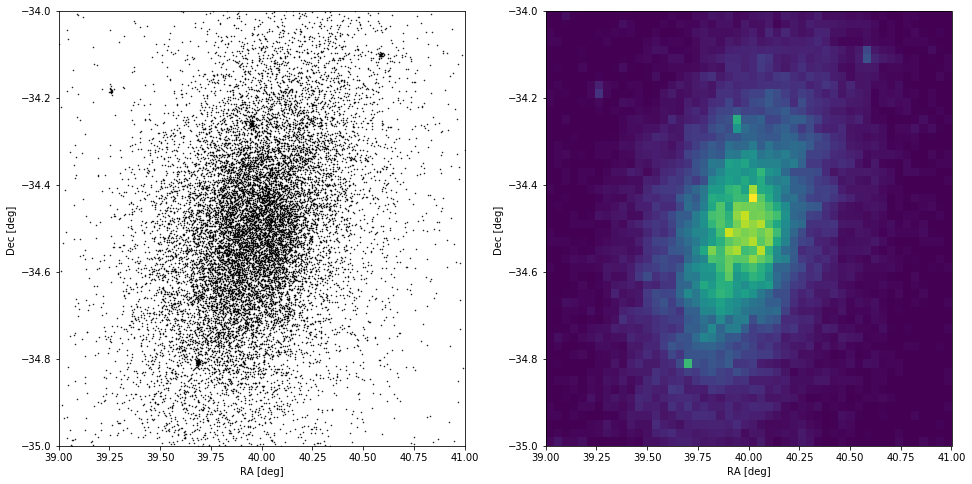

In [88]:
from scipy.ndimage import gaussian_filter as gs

figure(figsize=(16,8))
xl = [39, 41]
yl = [-35, -34]

j = (G<21)*(w<0.8)*(rad < 3.5)*(sep < 2*u.deg)
subplot(121)
plot(ra[j], dec[j], 'k.', ms=1, alpha=1)
xlabel('RA [deg]')
ylabel('Dec [deg] ')
xlim(xl)
ylim(yl)

subplot(122)

ext = [xl[0], xl[1], yl[0], yl[1]]
H, xl, yl = np.histogram2d(ra[j], dec[j], bins=(50,50), range=[[xl[0], xl[1]], [yl[0], yl[1]]])
imshow(np.rot90(gs(H,0.5)), extent=ext, aspect='auto')
xlabel('RA [deg]')
ylabel('Dec [deg] ')

savefig('fornax_core.png')

In [89]:
raerr = dss.ra_error.values
decerr = dss.dec_error.values

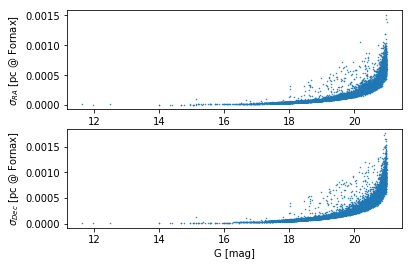

In [90]:
subplot(211)
plot(G[j], np.deg2rad(raerr[j]/(3600*1000))*140e3, '.', ms=1)
ylabel('$\sigma_{RA}$ [pc @ Fornax]')
subplot(212)
plot(G[j], np.deg2rad(decerr[j]/(3600*1000))*140e3, '.', ms=1)
xlabel('G [mag]')
ylabel('$\sigma_{Dec}$ [pc @ Fornax]')
savefig('poserr.png')

In [91]:
def sample_r(size=1):
    mu = np.random.random(size=size)
    return 1 / np.sqrt(mu**(-2/3) - 1)

n_samples = Nstar
r = sample_r(size=n_samples)

phi = np.random.uniform(0, 2*np.pi, size=n_samples)
theta = np.arccos(2*np.random.random(size=n_samples) - 1)

xyz = np.zeros((n_samples, 3))
xyz[:,0] = r * np.cos(phi) * np.sin(theta)
xyz[:,1] = r * np.sin(phi) * np.sin(theta)
xyz[:,2] = r * np.cos(theta)


17702


/Software/users/modules/7/software/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in less


[]

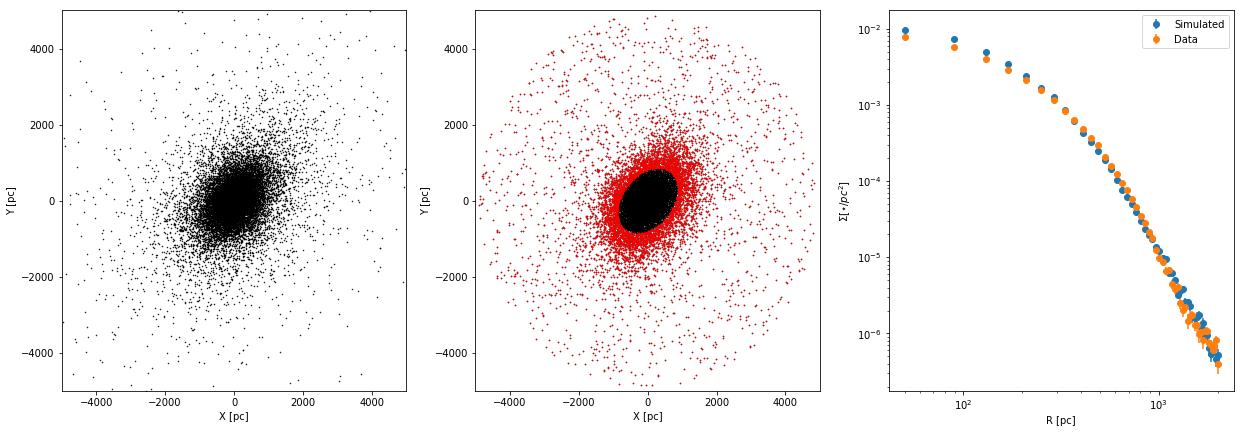

In [116]:
figure(figsize=(21,7))

pa = 46
PA = np.deg2rad(pa)
ecc=0.31
rs = np.deg2rad(12/60.)*140000

XYZ = np.zeros((n_samples, 2))
XYZ[:,0] = xyz[:,0]*rs/(1-ecc)
XYZ[:,1] = xyz[:,1]*rs

Xp = (XYZ[:,0]*np.cos(PA) - XYZ[:,1]*np.sin(PA))
Yp = (XYZ[:,0]*np.sin(PA) + XYZ[:,1]*np.cos(PA))

subplot(131)
plot(Xp[0:Nstar], Yp[0:Nstar], 'k.', ms=1)

xlim(-5000,5000)
ylim(-5000,5000)
xlabel('X [pc]')
ylabel('Y [pc]')



subplot(132)
xc = cen.ra.deg
yc = cen.dec.deg

j = (G<21)*(w<0.8)*(rad < 3.5)*(sep < 2*u.deg)
x = ra[j]
y = dec[j]
d = 140

X = 1000*d*np.cos(np.deg2rad(y))*np.sin(np.deg2rad(x - xc))
Y = 1000*d*(np.sin(np.deg2rad(y))*np.cos(np.deg2rad(yc)) - np.cos(np.deg2rad(y))*np.sin(np.deg2rad(yc))*np.cos(np.deg2rad(x - xc)))
plot(X,Y, 'k.', ms=1)

print(len(X))

np.savetxt('positions_gaia.dat', np.array([X,Y]).T, fmt='%.5f')

Rdata = ellR(X, Y, ra0=0, dec0=0, PA=pa, e=ecc, sky=False)
k = (Rdata > 1000)
plot(X[k],Y[k], 'r.', ms=1)

xlim(-5000,5000)
ylim(-5000,5000)
xlabel('X [pc]')
ylabel('Y [pc]')

subplot(133)

Rsim = ellR(Xp, Yp, ra0=0, dec0=0, PA=pa, e=ecc, sky=False)
Rdata = ellR(X, Y, ra0=0, dec0=0, PA=pa, e=ecc, sky=False)

sigsim, edg = np.histogram(Rsim[0:Nstar], bins=50, range=[10,4000])
sigdata, edg = np.histogram(Rdata, bins=50, range=[10,4000])
radius = edg[:1]+edg[1:]
radius *= 0.5
bsize = edg[1]-edg[0]
area = np.pi*(edg[1:]**2-edg[:1]**2)

errorbar(radius, sigsim/area, yerr=np.sqrt(sigsim)/area, ls='None', marker='o', label='Simulated')
errorbar(radius, sigdata/area, yerr=np.sqrt(sigsim)/area, ls='None', marker='o', label='Data')
legend(loc='best')
xlabel('R [pc]')
ylabel('$\Sigma [\star/pc^2]$')



loglog()


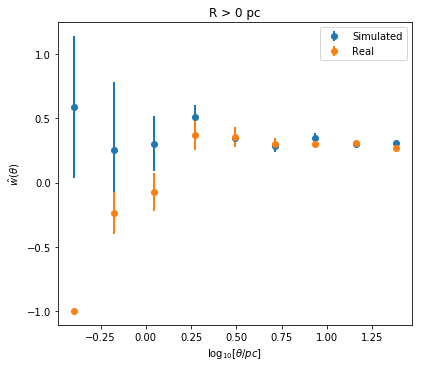

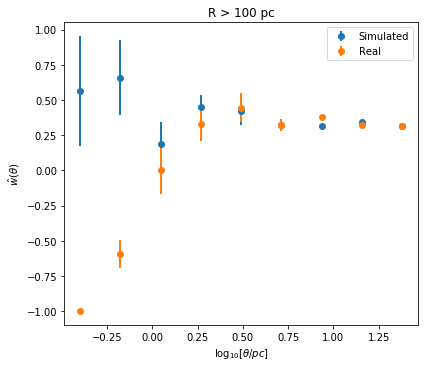

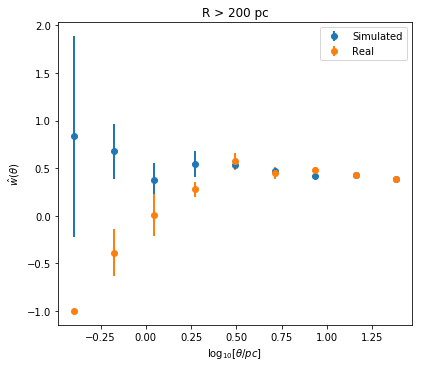

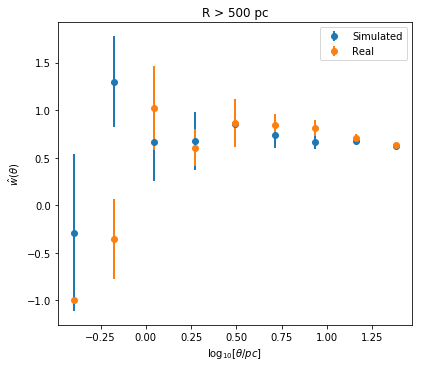

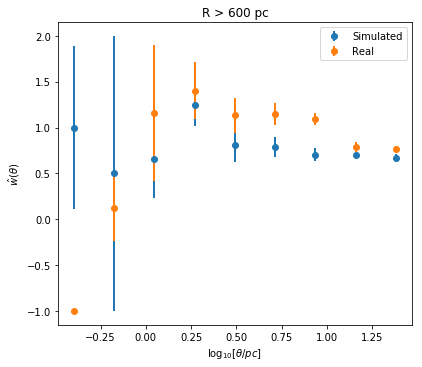

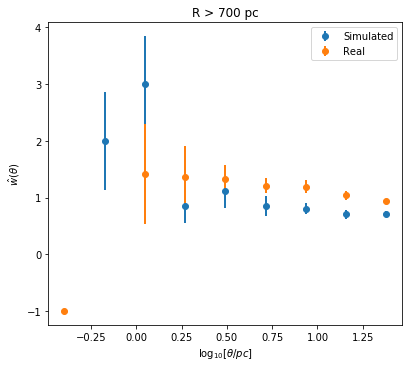

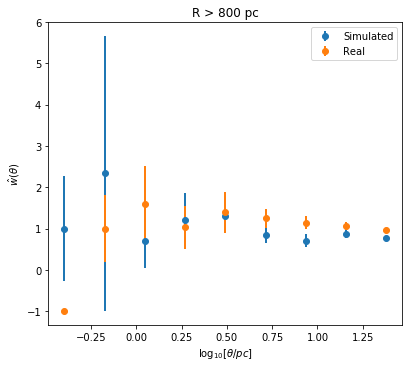

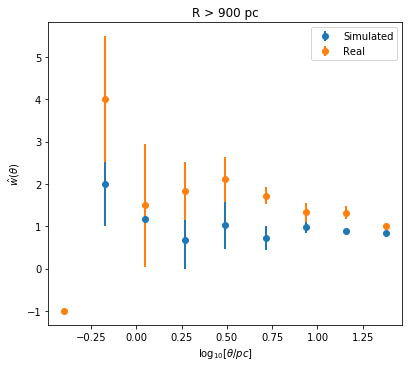

In [117]:
from astroML.correlation import two_point
from astroML.decorators import pickle_results
from astroML.datasets import fetch_sdss_specgals
from astroML.correlation import bootstrap_two_point




for maxrad in [0, 100, 200, 500, 600, 700, 800, 900]:
    k = Rsim > maxrad
    data_sim = np.array([Xp[k],Yp[k]]).T
    k = Rdata > maxrad
    data_real = np.array([X[k],Y[k]]).T
    
    #@pickle_results("correlation_functions.pkl")
    def compute_results(Nbins=10, Nbootstraps=10,  method='standard', rseed=0):
        np.random.seed(rseed)
        #bins = 10 ** np.linspace(np.log10(1. / 100.), np.log10(100), Nbins)
        bins = np.array([0, 0.5, 1, 10, 20, 30, 100])
        bins = np.arange(0, 30, 0.5)
        bins = 10**np.linspace(np.log10(0.3), np.log10(30), 10)
        results = [bins]
        for D in [data_sim, data_real]:
            results += bootstrap_two_point(D,
                                           bins=bins,
                                           method=method,
                                           Nbootstrap=Nbootstraps,
                                           return_bootstraps=True)
    
        return results
    
    
    
    
    (bins, sim_corr, sim_corr_err, sim_bootstraps,
     real_corr, real_corr_err, real_bootstraps) = compute_results()
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

    # Plot the results
    corr = [sim_corr, real_corr]
    corr_err = [sim_corr_err, real_corr_err]
    bootstraps = [sim_bootstraps, real_bootstraps]
    labels = ['Simulated',
              'Real']
    
    fig = plt.figure(figsize=(6, 6))
    fig.subplots_adjust(bottom=0.2, top=0.9,
                        left=0.13, right=0.95)
    
    ax = subplot(111)
    for i in range(2):
        ax.errorbar(np.log10(bin_centers), corr[i], corr_err[i],
                    fmt='o', lw=2, label=labels[i])
    
        if i == 0:
            ax.set_ylabel(r'$\hat{w}(\theta)$')
    
    ax.set_xlabel(r'$\log_{10} [\theta/pc]$')
    ax.set_title(r"R > "+ str(maxrad) +" pc")
    legend(loc='best')

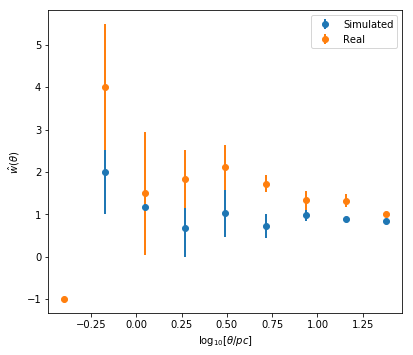

In [118]:
# Plot the results
corr = [sim_corr, real_corr]
corr_err = [sim_corr_err, real_corr_err]
bootstraps = [sim_bootstraps, real_bootstraps]
labels = ['Simulated',
          'Real']

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(bottom=0.2, top=0.9,
                    left=0.13, right=0.95)

ax = subplot(111)
for i in range(2):
    ax.errorbar(np.log10(bin_centers), corr[i], corr_err[i],
                fmt='o', lw=2, label=labels[i])

    if i == 0:
        ax.set_ylabel(r'$\hat{w}(\theta)$')

ax.set_xlabel(r'$\log_{10} [\theta/pc]$')
legend(loc='best')

In [216]:


NN = []
NNreal = []
avgD = []
for Nstar in np.arange(2e4,50e4, 2e4):
    n_samples = int(Nstar)
    print(Nstar)
    r = sample_r(size=n_samples)
    
    phi = np.random.uniform(0, 2*np.pi, size=n_samples)
    theta = np.arccos(2*np.random.random(size=n_samples) - 1)
    
    xyz = np.zeros((n_samples, 3))
    xyz[:,0] = r * np.cos(phi) * np.sin(theta)
    xyz[:,1] = r * np.sin(phi) * np.sin(theta)
    xyz[:,2] = r * np.cos(theta)
    
    pa = 46
    PA = np.deg2rad(pa)
    ecc=0.31
    rs = np.deg2rad(12/60.)*140000
    
    XYZ = np.zeros((n_samples, 2))
    XYZ[:,0] = xyz[:,0]*rs/(1-ecc)
    XYZ[:,1] = xyz[:,1]*rs
    
    Xp = (XYZ[:,0]*np.cos(PA) - XYZ[:,1]*np.sin(PA))
    Yp = (XYZ[:,0]*np.sin(PA) + XYZ[:,1]*np.cos(PA))
    Rsim = ellR(Xp, Yp, ra0=0, dec0=0, PA=pa, e=ecc, sky=False)
    
    j = Rsim < rs
    
    Xp = Xp[j]
    Yp = Yp[j]
    
    from sklearn.neighbors import NearestNeighbors
    POS = np.array([Xp, Yp]).T
    nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(POS)
    distances, indices = nbrs.kneighbors(POS)
    NN.append(len(Xp))
    NNreal.append(n_samples)
    avgD.append(np.mean(distances[:,1]))
    
    

20000.0
40000.0
60000.0
80000.0
100000.0
120000.0
140000.0
160000.0
180000.0
200000.0
220000.0
240000.0
260000.0
280000.0
300000.0
320000.0
340000.0
360000.0
380000.0
400000.0
420000.0
440000.0
460000.0
480000.0


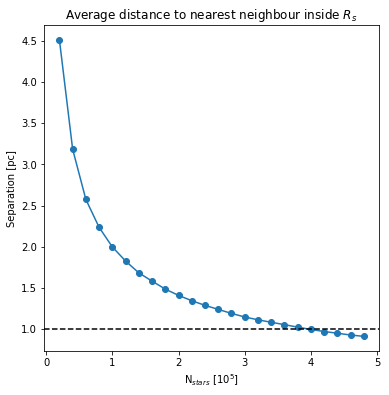

In [235]:

figure(figsize=(6,6))
plot(np.array(NNreal)/1e5, avgD, 'o-')


title('Average distance to nearest neighbour inside $R_s$')
xlabel('N$_{stars}$ [10$^5$]')
ylabel('Separation [pc]')
axhline(1, ls='--',c='k')
